### MAJOR PROJECT :: HOUSE PRICE PREDICTION

###IMPORTING LIBRARIES

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

###Importing datasets

In [200]:
hou = pd.read_csv('/content/House_Prediction (1).csv')

In [201]:
hou.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [202]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [203]:
hou.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [204]:
hou.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [205]:
hou.shape

(4600, 18)

In [206]:
hou.size

82800

In [207]:
hou.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [208]:
hou.isnull().value_counts()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city   statezip  country
False  False  False     False      False        False     False   False       False  False      False       False          False     False         False   False  False     False      4600
dtype: int64

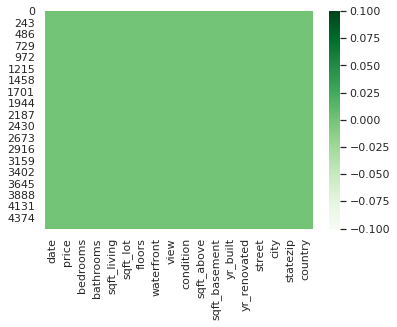

In [209]:
import seaborn as sns
sns.heatmap(hou.isnull(), cmap = 'Greens')

### GRAPHICAL REPPRESENTATION

<function matplotlib.pyplot.show>

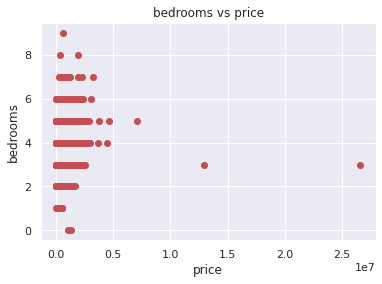

In [210]:
x = hou.price
y = hou.bedrooms
plt.scatter(x,y,c='r')
plt.title("Scatter Graph")
plt.ylabel('bedrooms')
plt.xlabel('price')
plt.title('bedrooms vs price')
plt.show

<function matplotlib.pyplot.show>

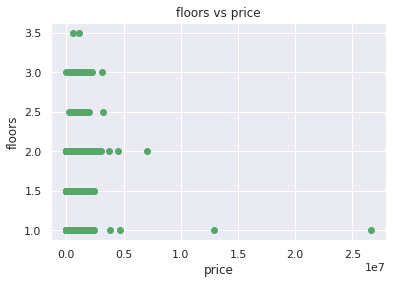

In [211]:
x = hou.price
y = hou.floors
plt.scatter(x,y,c='g')
plt.title("Scatter Graph")
plt.ylabel('floors')
plt.xlabel('price')
plt.title('floors vs price')
plt.show

### NUMERICAL VALUE ANALYSIS

In [212]:
hou.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

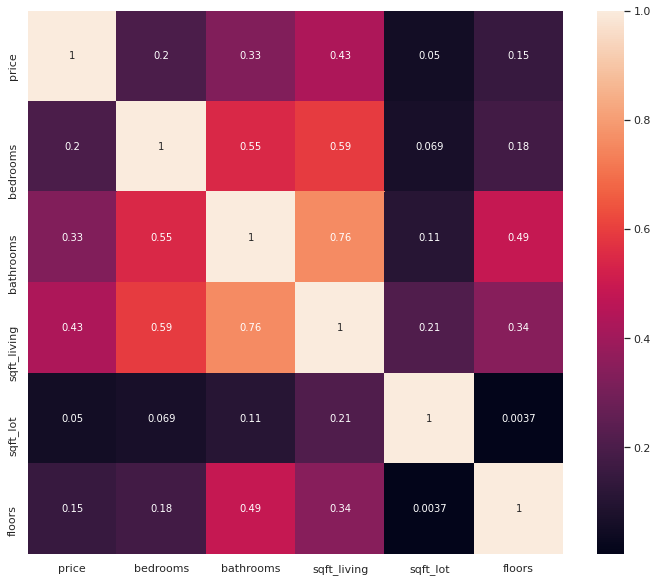

In [213]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(hou[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors']].corr(), annot=True)

### CLEANING DATA ::

### PRICE

In [214]:
hou['price'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: price, Length: 4600, dtype: bool

In [215]:
hou['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

In [216]:
hou.price.mean()

551962.9884732141

In [217]:
hou['price'] = hou['price'].replace(0.0,hou.price.mean())

In [218]:
hou.price.value_counts()

551962.988473    49
300000.000000    42
400000.000000    31
440000.000000    29
450000.000000    29
                 ..
586500.000000     1
693000.000000     1
226500.000000     1
257200.000000     1
256000.000000     1
Name: price, Length: 1741, dtype: int64

In [219]:
hou['price'].isnull().sum()

0

In [220]:
hou.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### PRICE VS YEAR BUILD

In [221]:
hou.price.isnull().value_counts()

False    4600
Name: price, dtype: int64

In [222]:
hou['price'].nunique()

1741

In [223]:
hou['yr_built'].nunique()

115

In [224]:
hou['yr_built'].value_counts()

2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

In [225]:
hou.yr_built.isnull().value_counts()

False    4600
Name: yr_built, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


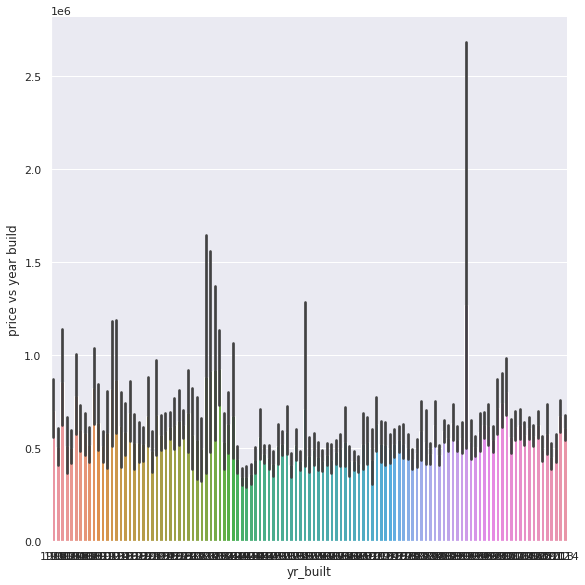

In [226]:
bargraph_pricevsyearbuild = sns.factorplot(x = "yr_built", y = "price", data = hou, kind = "bar", size = 8)
bargraph_pricevsyearbuild = bargraph_pricevsyearbuild.set_ylabels("price vs year build")

### price vs floors

In [227]:
hou.floors.isnull().value_counts()

False    4600
Name: floors, dtype: int64

In [228]:
hou.floors.nunique()

6

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


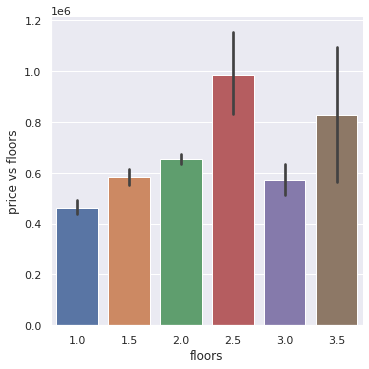

In [229]:
price_floor = sns.factorplot(x="floors",y="price",data=hou, kind="bar")
price_floor = price_floor.set_ylabels("price vs floors")

### veiws,waterfront,sqft_basement,street,city,statezip,country

In [230]:
hou.isnull().value_counts()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city   statezip  country
False  False  False     False      False        False     False   False       False  False      False       False          False     False         False   False  False     False      4600
dtype: int64

In [231]:
hou['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [232]:
hou['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [233]:
col = ['view','waterfront']
hou.drop(col , axis=1 , inplace=True)

In [234]:
hou.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [235]:
hou['sqft_basement'].nunique()

207

In [236]:
hou['sqft_basement'].value_counts()

0       2745
500       53
600       45
800       43
900       41
        ... 
2180       1
2850       1
2300       1
265        1
2200       1
Name: sqft_basement, Length: 207, dtype: int64

In [237]:
hou['sqft_above'].value_counts()

1010    47
1200    47
1300    45
1140    44
1320    43
        ..
2795     1
2807     1
806      1
5060     1
4110     1
Name: sqft_above, Length: 511, dtype: int64

In [238]:
hou.sqft_above.isnull().value_counts()

False    4600
Name: sqft_above, dtype: int64

In [239]:
hou.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [240]:
sd = [ 'sqft_basement', 'street', 'city', 'statezip', 'country']
hou.drop(sd , axis = 1, inplace = True)

In [241]:
hou.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,yr_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,3,1340,1955,2005
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,1921,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,4,1930,1966,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1963,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,4,1140,1976,1992


In [242]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4600 non-null   object 
 1   price         4600 non-null   float64
 2   bedrooms      4600 non-null   float64
 3   bathrooms     4600 non-null   float64
 4   sqft_living   4600 non-null   int64  
 5   sqft_lot      4600 non-null   int64  
 6   floors        4600 non-null   float64
 7   condition     4600 non-null   int64  
 8   sqft_above    4600 non-null   int64  
 9   yr_built      4600 non-null   int64  
 10  yr_renovated  4600 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 395.4+ KB


### year rennovated , date


In [243]:
hou['yr_renovated'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: yr_renovated, Length: 4600, dtype: bool

In [244]:
hou['yr_renovated'].value_counts()

0       2735
2000     170
2003     151
2001     109
2009     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2008      45
2012      45
1988      43
1983      41
1999      41
2002      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1982      22
1996      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1968       9
1970       9
1954       8
2007       7
1945       7
1934       6
1974       6
1971       5
1986       5
1958       5
1978       3
1995       2
1955       2
1980       2
1913       1
1975       1
1977       1
1981       1
1991       1
1987       1
1960       1
1948       1
1966       1
1953       1
Name: yr_renovated, dtype: int64

In [245]:
hou['yr_renovated'].max()

2014

In [246]:
hou['yr_renovated'].min()

0

In [247]:
hou['yr_renovated'].mean()

808.6082608695652

In [248]:
hou['yr_renovated'].std()

979.4145364007688

In [249]:
hou['date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: date, Length: 4600, dtype: bool

In [250]:
hou['date'].value_counts()

2014-06-23 00:00:00    142
2014-06-26 00:00:00    131
2014-06-25 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-05-11 00:00:00      2
2014-07-04 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [251]:
rk = ['yr_renovated','date']
hou.drop(rk, axis=1, inplace=True)

In [252]:
hou.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,1921
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,1966
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,1976


SQFT_ABOVE VS PRICE

In [253]:
hou['sqft_above'].value_counts()

1010    47
1200    47
1300    45
1140    44
1320    43
        ..
2795     1
2807     1
806      1
5060     1
4110     1
Name: sqft_above, Length: 511, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


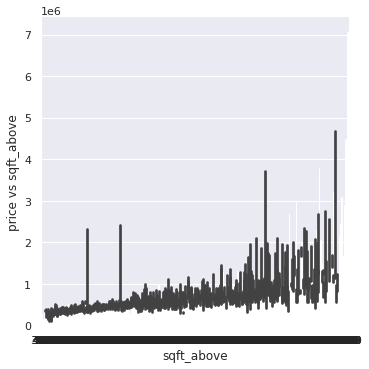

In [254]:
sqftabove_price = sns.factorplot(x="sqft_above",y="price",data=hou,kind="bar")
sqftabove_price = sqftabove_price.set_ylabels("price vs sqft_above")

### condition vs price

In [255]:
hou['condition'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: condition, Length: 4600, dtype: bool

In [256]:
hou['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


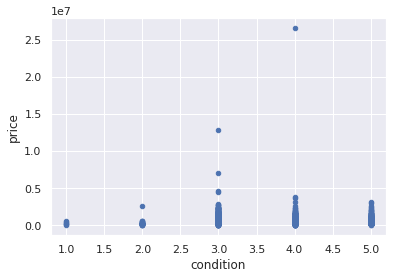

In [257]:
hou.plot(kind = 'scatter', x = 'condition', y = 'price')
plt.show()

### bathrooms vs price

In [258]:
hou['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
8.00       1
6.50       1
5.75       1
6.75       1
Name: bathrooms, dtype: int64

In [259]:
rf = ['bathrooms']
hou.drop(rf,axis=1,inplace=True)

In [260]:
hou.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built
0,313000.0,3.0,1340,7912,1.5,3,1340,1955
1,2384000.0,5.0,3650,9050,2.0,5,3370,1921
2,342000.0,3.0,1930,11947,1.0,4,1930,1966
3,420000.0,3.0,2000,8030,1.0,4,1000,1963
4,550000.0,4.0,1940,10500,1.0,4,1140,1976


In [261]:
hou.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'yr_built'],
      dtype='object')

### bedrooms vs price

In [262]:
hou['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [263]:
hou['bedrooms'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: bedrooms, Length: 4600, dtype: bool

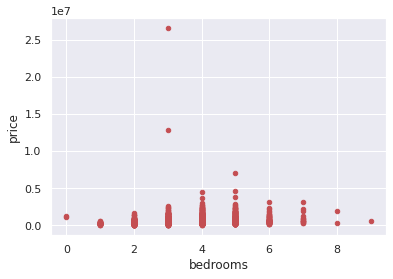

In [264]:
hou.plot(kind = 'scatter', y = 'price', x = 'bedrooms',c = 'r')
plt.show()

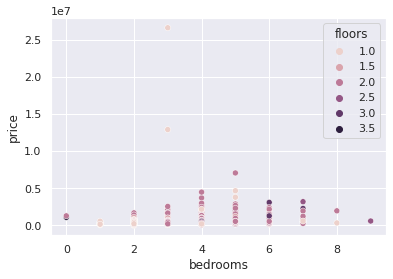

In [265]:
sns.scatterplot(y = 'price', x = 'bedrooms', data= hou, hue= 'floors')

### sqft_living vs price

In [266]:
hou['sqft_living'].value_counts()

1940    32
1720    32
1660    31
1840    31
2000    30
        ..
4200     1
4160     1
2015     1
2009     1
4110     1
Name: sqft_living, Length: 566, dtype: int64

In [267]:
hou['sqft_living'].nunique()

566

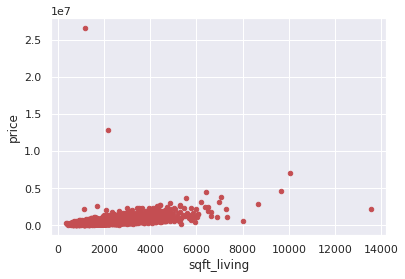

In [268]:
hou.plot(kind = 'scatter', y = 'price', x = 'sqft_living',c = 'r')
plt.show()

### **sqft_lot vs price**

In [269]:
hou['sqft_lot'].value_counts()

5000     80
6000     65
4000     54
7200     50
4800     29
         ..
1130      1
11367     1
5220      1
3171      1
18804     1
Name: sqft_lot, Length: 3113, dtype: int64

In [270]:
hou['sqft_lot'].isnull().unique()

array([False])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


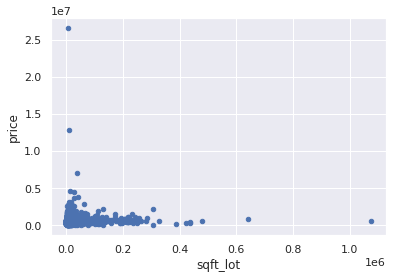

In [271]:
hou.plot(kind = 'scatter', y = 'price', x = 'sqft_lot')
plt.show()

In [272]:
hou.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'yr_built'],
      dtype='object')

In [273]:
hou.isnull().any()

price          False
bedrooms       False
sqft_living    False
sqft_lot       False
floors         False
condition      False
sqft_above     False
yr_built       False
dtype: bool

In [274]:
from pandas.plotting import boxplot, scatter_matrix

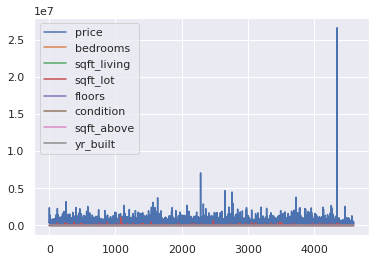

In [275]:
hou.plot()

[]

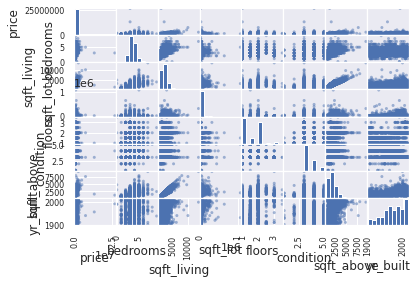

In [276]:
scatter_matrix(hou)
plt.plot()

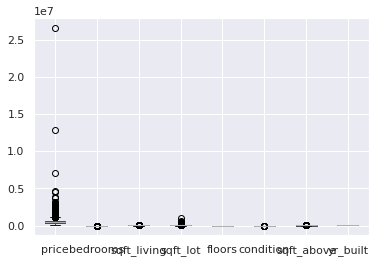

In [277]:
boxplot(hou)


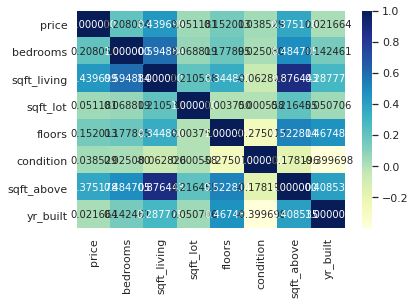

In [278]:
sns.heatmap(hou.corr(), cmap = 'YlGnBu', annot = True, fmt = 'f')

In [279]:
hou

,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built
0,3.130000e+05,3.0,1340,7912,1.5,3,1340,1955
1,2.384000e+06,5.0,3650,9050,2.0,5,3370,1921
2,3.420000e+05,3.0,1930,11947,1.0,4,1930,1966
3,4.200000e+05,3.0,2000,8030,1.0,4,1000,1963
4,5.500000e+05,4.0,1940,10500,1.0,4,1140,1976
...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1510,6360,1.0,4,1510,1954
4596,5.343333e+05,3.0,1460,7573,2.0,3,1460,1983
4597,4.169042e+05,3.0,3010,7014,2.0,3,3010,2009
4598,2.034000e+05,4.0,2090,6630,1.0,3,1070,1974


In [280]:
hou.sort_values(by = 'price', ignore_index= True)

,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built
0,7800.0,2.0,780,16344,1.0,1,780,1942
1,80000.0,1.0,430,5050,1.0,2,430,1912
2,83000.0,2.0,900,8580,1.0,3,900,1918
3,83300.0,3.0,1490,7770,1.0,4,1490,1990
4,83300.0,3.0,1370,78408,1.0,5,1370,1964
...,...,...,...,...,...,...,...,...
4595,4489000.0,4.0,6430,27517,2.0,3,6430,2001
4596,4668000.0,5.0,9640,13068,1.0,3,4820,1983
4597,7062500.0,5.0,10040,37325,2.0,3,7680,1940
4598,12899000.0,3.0,2190,11394,1.0,3,1550,1956


### **splitting data**

In [281]:
# input and output data

x = hou.drop(hou.columns[[0]], axis = 1)
y = hou['price']

In [282]:
x.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built
0,3.0,1340,7912,1.5,3,1340,1955
1,5.0,3650,9050,2.0,5,3370,1921
2,3.0,1930,11947,1.0,4,1930,1966
3,3.0,2000,8030,1.0,4,1000,1963
4,4.0,1940,10500,1.0,4,1140,1976


In [283]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [284]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

### **featuring scaling**

In [285]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.fit_transform(xtest)

### classifiction

In [286]:
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr = svm.SVR()
rf = RandomForestRegressor()

In [287]:
linear.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [288]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [289]:
svr.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [290]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### **predictions**

In [295]:
y_pred_linear = linear.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

### **RMSE MODEL**

In [292]:
import math
error_linear = math.sqrt(mean_squared_error((y_pred_linear), ytest))  
error_dt = math.sqrt(mean_squared_error(y_pred_dt, ytest))
error_svr = math.sqrt(mean_squared_error(y_pred_svr, ytest))  
error_rf = math.sqrt(mean_squared_error(y_pred_rf, ytest))

In [293]:
print ("    Model           :     RMSE Error\n" )
print ("Linear Regression   : ", error_linear)
print ("Decision Tree       : ", error_dt)
print ("Support Vector      : ", error_svr)
print ("Random Forest       : ", error_rf)

    Model           :     RMSE Error

Linear Regression   :  918054.0966102857
Decision Tree       :  1037570.2927144241
Support Vector      :  796832.030299058
Random Forest       :  947778.9361293644
